In [1]:
from factor_analysis import *

In [2]:
barra_style = ['momentum','beta','book_to_price','earnings_yield','liquidity','size','residual_volatility','non_linear_size','leverage','growth']

# specific_return = get_specific_return(stock_list, get_previous_trading_date(start_date,63), end_date, model = 'v1',industry_mapping='sws_2021')
# specific_return.to_pickle('data/specific_return.pkl')

barra_dict = pd.read_pickle('./data/barra_dict.pkl')                # barra因子值
barra_return = pd.read_pickle('./data/barra_return.pkl')            # 纯因子收益率
specific_return = pd.read_pickle('data/specific_return.pkl')        # 特质收益率

### 因子动量

In [3]:
start_date = '2011-01-01'
end_date = '2019-01-01'

universe = '000905.XSHG'

index_fix = INDEX_FIX(start_date,end_date,universe)
stock_list = index_fix.columns.tolist()
date_list = index_fix.index.tolist()

In [4]:
factor_dict = {
    # value
    'dp':Factor('dividend_yield_ttm'),
    'ep':Factor('ep_ratio_ttm'),
    'bp':Factor('book_to_market_ratio_ttm'),
    'sp':Factor('sp_ratio_ttm'),
    # growth
    'sg':Factor('inc_revenue_ttm'),
    'ng':Factor('net_profit_growth_ratio_ttm'),
    # profit
    'roe':Factor('return_on_equity_ttm'),
    'roa':Factor('return_on_asset_net_profit_ttm'),
    'gpm':Factor('gross_profit_margin_ttm'),
    'npm':Factor('net_profit_to_revenue_ttm'),
    # leverage
    'cur':Factor('current_ratio_ttm'),
    'car':Factor('cash_ratio_ttm'),
    # mc
    'mc2':LOG(Factor('market_cap_2')) * -1,
    # trun
    'h20':(Factor('close')/REF(Factor('close'),20) - 1) * -1,
    'h60':(Factor('close')/REF(Factor('close'),20*3) - 1) * -1,
    'h240':(Factor('close')/REF(Factor('close'),20*12) - 1) * -1,
    # vol
    'v60':STD(Factor('close'),20*3) * -1,
    'v120':STD(Factor('close'),20*6) * -1,
    'v240':STD(Factor('close'),20*12) * -1,
}

new_stock_filter = get_new_stock_filter(stock_list,date_list)
st_filter = get_st_filter(stock_list,date_list)
suspended_filter = get_suspended_filter(stock_list,date_list)
limit_up_down_filter = get_limit_up_down_filter(stock_list,date_list)

combo_mask = (new_stock_filter.astype(int) 
                + st_filter.astype(int)
                + suspended_filter.astype(int)
                + limit_up_down_filter.astype(int)
                + (~index_fix).astype(int)) == 0

combo_mask.to_pickle(f'tmp/combo_mask_{start_date}_{end_date}.pkl')

剔除新股已构建
剔除ST已构建
剔除停牌已构建
剔除开盘涨停已构建


In [5]:
value_dict = {}
ic_df = pd.DataFrame(index = date_list)
for k,v in factor_dict.items():
    df = execute_factor(v,stock_list,start_date,end_date)
    df = df.mask(~combo_mask).dropna(how = 'all',axis = 1)
    df = data_clean(df)
    value_dict[k] = df
    a,b = Quick_Factor_Return_N_IC(df,20,k)
    ic_df[k] = a

100%|██████████| 1945/1945 [00:05<00:00, 380.90it/s]


{'name': 'dp', 'IC mean': 0.0364, 'IC std': 0.0669, 'IR': 0.5447, 'IR_ly': 0.8401, 'IC>0': 0.7049, 'ABS_IC>2%': 0.8332, 't_stat': 23.9001}


100%|██████████| 1945/1945 [00:05<00:00, 383.77it/s]


{'name': 'ep', 'IC mean': 0.0499, 'IC std': 0.0963, 'IR': 0.5187, 'IR_ly': 0.3484, 'IC>0': 0.6758, 'ABS_IC>2%': 0.8436, 't_stat': 22.7564}


100%|██████████| 1945/1945 [00:05<00:00, 383.84it/s]


{'name': 'bp', 'IC mean': 0.0335, 'IC std': 0.1166, 'IR': 0.2874, 'IR_ly': 0.2766, 'IC>0': 0.5974, 'ABS_IC>2%': 0.867, 't_stat': 12.6076}


100%|██████████| 1945/1945 [00:05<00:00, 382.64it/s]


{'name': 'sp', 'IC mean': 0.0223, 'IC std': 0.0943, 'IR': 0.2367, 'IR_ly': 0.1567, 'IC>0': 0.5517, 'ABS_IC>2%': 0.8587, 't_stat': 10.3858}


100%|██████████| 1945/1945 [00:05<00:00, 381.18it/s]


{'name': 'sg', 'IC mean': 0.0228, 'IC std': 0.0653, 'IR': 0.3494, 'IR_ly': -0.5443, 'IC>0': 0.5932, 'ABS_IC>2%': 0.7371, 't_stat': 15.328}


100%|██████████| 1945/1945 [00:05<00:00, 384.15it/s]


{'name': 'ng', 'IC mean': 0.0283, 'IC std': 0.0665, 'IR': 0.4256, 'IR_ly': 0.002, 'IC>0': 0.6727, 'ABS_IC>2%': 0.7834, 't_stat': 18.6748}


100%|██████████| 1945/1945 [00:05<00:00, 383.56it/s]


{'name': 'roe', 'IC mean': 0.0355, 'IC std': 0.0896, 'IR': 0.3963, 'IR_ly': 0.2171, 'IC>0': 0.6208, 'ABS_IC>2%': 0.8182, 't_stat': 17.3883}


100%|██████████| 1945/1945 [00:05<00:00, 382.19it/s]


{'name': 'roa', 'IC mean': 0.0365, 'IC std': 0.0913, 'IR': 0.3999, 'IR_ly': 0.4121, 'IC>0': 0.6499, 'ABS_IC>2%': 0.8468, 't_stat': 17.5472}


100%|██████████| 1945/1945 [00:05<00:00, 381.67it/s]


{'name': 'gpm', 'IC mean': 0.0192, 'IC std': 0.0709, 'IR': 0.2703, 'IR_ly': 0.1794, 'IC>0': 0.6187, 'ABS_IC>2%': 0.8171, 't_stat': 11.8605}


100%|██████████| 1945/1945 [00:05<00:00, 382.85it/s]


{'name': 'npm', 'IC mean': 0.0274, 'IC std': 0.0723, 'IR': 0.3785, 'IR_ly': 0.3053, 'IC>0': 0.6358, 'ABS_IC>2%': 0.814, 't_stat': 16.6085}


100%|██████████| 1945/1945 [00:05<00:00, 382.98it/s]


{'name': 'cur', 'IC mean': 0.0095, 'IC std': 0.0649, 'IR': 0.1469, 'IR_ly': 0.5327, 'IC>0': 0.5823, 'ABS_IC>2%': 0.7823, 't_stat': 6.4431}


100%|██████████| 1945/1945 [00:05<00:00, 383.00it/s]


{'name': 'car', 'IC mean': 0.0121, 'IC std': 0.0567, 'IR': 0.2138, 'IR_ly': 0.6402, 'IC>0': 0.5886, 'ABS_IC>2%': 0.7392, 't_stat': 9.3808}


100%|██████████| 1945/1945 [00:05<00:00, 383.78it/s]


{'name': 'mc2', 'IC mean': 0.0104, 'IC std': 0.0722, 'IR': 0.1445, 'IR_ly': -0.3598, 'IC>0': 0.574, 'ABS_IC>2%': 0.8016, 't_stat': 6.3386}


100%|██████████| 1945/1945 [00:05<00:00, 381.83it/s]


{'name': 'h20', 'IC mean': 0.0554, 'IC std': 0.1111, 'IR': 0.4985, 'IR_ly': 0.2533, 'IC>0': 0.6764, 'ABS_IC>2%': 0.854, 't_stat': 21.8711}


100%|██████████| 1945/1945 [00:05<00:00, 379.93it/s]


{'name': 'h60', 'IC mean': 0.05, 'IC std': 0.1212, 'IR': 0.4124, 'IR_ly': -0.1566, 'IC>0': 0.6468, 'ABS_IC>2%': 0.879, 't_stat': 18.096}


100%|██████████| 1945/1945 [00:05<00:00, 380.07it/s]


{'name': 'h240', 'IC mean': 0.0152, 'IC std': 0.0965, 'IR': 0.1579, 'IR_ly': -0.2325, 'IC>0': 0.574, 'ABS_IC>2%': 0.8442, 't_stat': 6.9285}


100%|██████████| 1945/1945 [00:05<00:00, 381.55it/s]


{'name': 'v60', 'IC mean': 0.0134, 'IC std': 0.0816, 'IR': 0.1638, 'IR_ly': 0.5909, 'IC>0': 0.5787, 'ABS_IC>2%': 0.8104, 't_stat': 7.1886}


100%|██████████| 1945/1945 [00:05<00:00, 382.95it/s]


{'name': 'v120', 'IC mean': 0.0139, 'IC std': 0.0841, 'IR': 0.1652, 'IR_ly': 0.5678, 'IC>0': 0.5881, 'ABS_IC>2%': 0.8078, 't_stat': 7.2487}


100%|██████████| 1945/1945 [00:05<00:00, 376.46it/s]


{'name': 'v240', 'IC mean': 0.0155, 'IC std': 0.0778, 'IR': 0.1992, 'IR_ly': 0.5981, 'IC>0': 0.6036, 'ABS_IC>2%': 0.8255, 't_stat': 8.7403}


#### 横截面动量

##### 1. 等权

In [6]:
value = standardize(value_dict['dp'].add(value_dict['ep'],
                                    #fill_value = 0).add(value_dict['bp'],
                                    #                    fill_value = 0).add(value_dict['sp'],
                                                                            fill_value = 0))

growth = standardize(value_dict['sg'].add(value_dict['ng'],
                                    fill_value = 0))


profit = standardize(value_dict['roe'].add(value_dict['roa'],
                                    #fill_value = 0).add(value_dict['gpm'],
                                                        fill_value = 0).add(value_dict['npm'],
                                                                            fill_value = 0))

# leverage = standardize(value_dict['cur'].add(value_dict['car'],
#                                     fill_value = 0))

# mc = standardize(value_dict['mc2'])

trun = standardize(value_dict['h20'].add(value_dict['h60'],
                                    fill_value = 0))   #.add(value_dict['h240'],fill_value = 0))

# vol = standardize(value_dict['v60'].add(value_dict['v120'],
#                                     fill_value = 0).add(value_dict['h240'],
#                                                         fill_value = 0))

ew_combo = standardize(value.add(growth,
                                    fill_value = 0).add(profit,
                                    #fill_value = 0).add(leverage,
                                    #fill_value = 0).add(mc,
                                    fill_value = 0).add(trun,
                                    #fill_value = 0).add(vol,
                                    fill_value = 0))

100%|██████████| 60/60 [00:03<00:00, 16.26it/s]


,净值,年化收益率,超额年化收益率,夏普比率,跟踪误差,信息比率,最大回测,卡玛比率,日平均换手率
net,2.2332,19.49,12.6,0.47,0.069265,2.38,43.91,0.38,0.034178


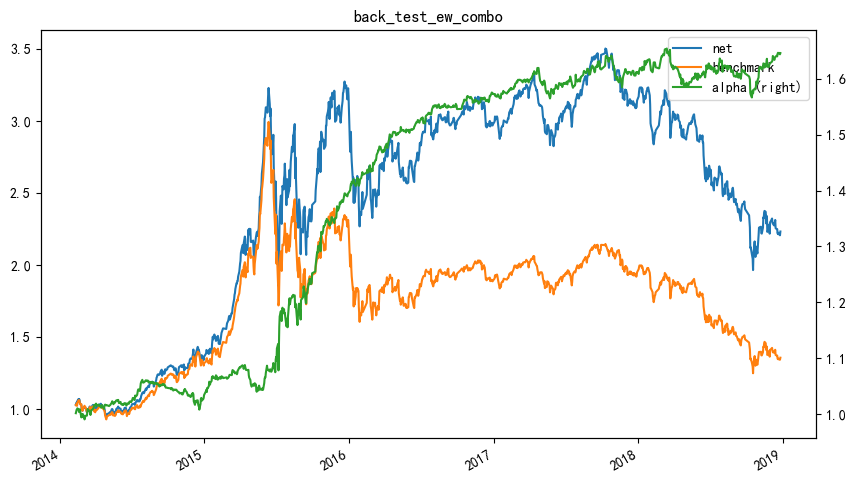

In [40]:
net,performance = BACKTEST(ew_combo.loc['2014-02-01':],'ew_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG',fig=True)
performance

##### 2. IC加权

In [9]:
cat_value = {
    'value':value,
    'growth':growth,
    'profit':profit,
    'trun':trun,
}

cat_ic_df = pd.DataFrame(index = date_list)
for k,v in cat_value.items():
    a,b = Quick_Factor_Return_N_IC(v,20,k)
    cat_ic_df[k] = a

{'name': 'value', 'IC mean': 0.0501, 'IC std': 0.0878, 'IR': 0.5703, 'IR_ly': 0.6162, 'IC>0': 0.7055, 'ABS_IC>2%': 0.8623, 't_stat': 25.0232}
{'name': 'growth', 'IC mean': 0.0298, 'IC std': 0.0714, 'IR': 0.4174, 'IR_ly': -0.2692, 'IC>0': 0.6436, 'ABS_IC>2%': 0.8052, 't_stat': 18.3131}
{'name': 'profit', 'IC mean': 0.0359, 'IC std': 0.0889, 'IR': 0.4036, 'IR_ly': 0.3274, 'IC>0': 0.6488, 'ABS_IC>2%': 0.8353, 't_stat': 17.7057}
{'name': 'trun', 'IC mean': 0.0599, 'IC std': 0.124, 'IR': 0.4834, 'IR_ly': 0.0217, 'IC>0': 0.6738, 'ABS_IC>2%': 0.8816, 't_stat': 21.207}


In [11]:
value_df = pd.DataFrame(index = cat_value['value'].stack().index)
for k,v in cat_value.items():
    value_df[k] = v.stack()
value_df.index.names = ['date','order_book_id']

In [12]:
value_df

value    growth    profit      trun
date       order_book_id                                        
2011-01-04 000005.XSHE   -2.361067  0.055294 -2.314675  0.469660
           000006.XSHE    1.822474  2.226852  0.087071  1.253064
           000016.XSHE   -0.563182  0.050935 -1.038563  1.104012
           000028.XSHE   -0.254653 -0.019732 -0.571795  1.213310
           000029.XSHE   -1.333364  1.566112 -0.525418  0.416745
...                            ...       ...       ...       ...
2018-12-28 603877.XSHG    0.861310  1.243132  1.275635 -1.509378
           603883.XSHG   -0.076099  0.104993 -0.420900  1.587995
           603885.XSHG    0.207622  0.194347  0.684305  0.348914
           603888.XSHG    0.024693  0.240858  0.790403  0.894972
           603899.XSHG   -1.811919  0.427664  0.301731 -0.810336

[903287 rows x 4 columns]

In [13]:
icw_record = pd.DataFrame(index = ['净值','年化收益率','超额年化收益率','夏普比率','跟踪误差','信息比率','最大回测','卡玛比率','日平均换手率'])
for n in tqdm(range(6,36,1)):
    icw = cat_ic_df.rolling(20 * n).mean().shift(20)
    icw.index.names = ['date']
    icw_combo = value_df.mul(icw,axis = 1).dropna(how = 'all').sum(axis = 1).unstack('order_book_id')
    net,performance = BACKTEST(icw_combo.loc['2014-02-01':],'icw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
    icw_record[str(n)] = performance.loc['net']

100%|██████████| 30/30 [02:17<00:00,  4.58s/it]


<Axes: >

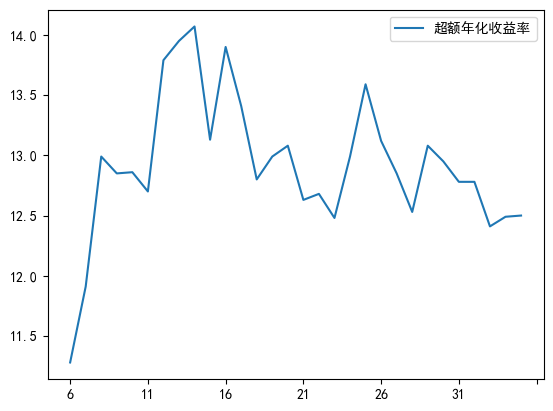

In [14]:
icw_record.T[['超额年化收益率']].plot()

##### 3. ICIR加权

In [28]:
irw_record = pd.DataFrame(index = ['净值','年化收益率','超额年化收益率','夏普比率','跟踪误差','信息比率','最大回测','卡玛比率','日平均换手率'])
for n in tqdm(range(6,36,1)):
    irw = (cat_ic_df.rolling(20 * n).mean()/cat_ic_df.rolling(20 * n).std()).shift(20)
    irw.index.names = ['date']
    irw_combo = value_df.mul(irw,axis = 1).dropna().sum(axis = 1).unstack('order_book_id')
    net,performance = BACKTEST(irw_combo.loc['2014-02-01':],'irw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
    irw_record[str(n)] = performance.loc['net']

100%|██████████| 30/30 [06:11<00:00, 12.37s/it]


<Axes: >

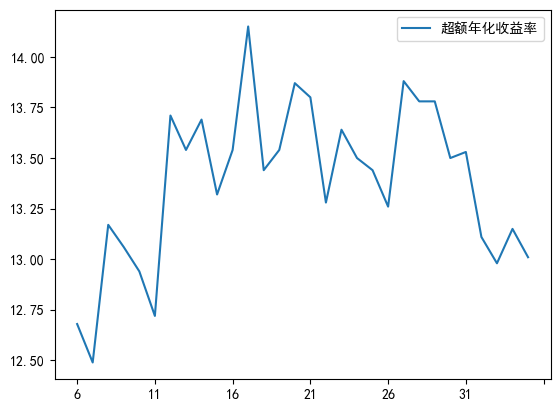

In [29]:
irw_record.T[['超额年化收益率']].plot()

##### 4.ICWR加权

In [30]:
icwr_record = pd.DataFrame(index = ['净值','年化收益率','超额年化收益率','夏普比率','跟踪误差','信息比率','最大回测','卡玛比率','日平均换手率'])
for n in tqdm(range(6,36,1)):
    icwr = (cat_ic_df.rolling(20 * n).apply(lambda x: (x>0).sum()/x.count())).shift(20)
    icwr.index.names = ['date']
    icwr_combo = value_df.mul(icwr,axis = 1).dropna().sum(axis = 1).unstack('order_book_id')
    net,performance = BACKTEST(icwr_combo.loc['2014-02-01':],'irw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
    icwr_record[str(n)] = performance.loc['net']

100%|██████████| 30/30 [03:42<00:00,  7.43s/it]


<Axes: >

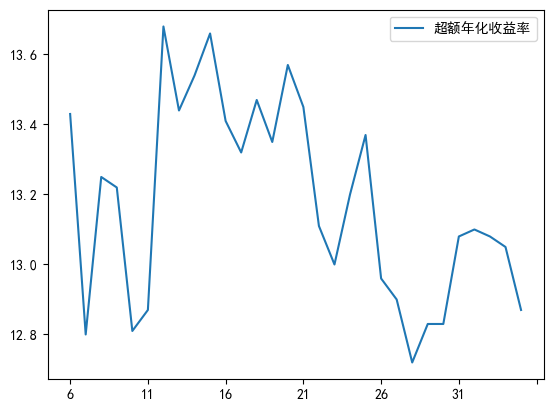

In [31]:
icwr_record.T[['超额年化收益率']].plot()

#### 时序因子动量+横截面因子动量

In [32]:
icw_tscs_record = pd.DataFrame(index = ['净值','年化收益率','超额年化收益率','夏普比率','跟踪误差','信息比率','最大回测','卡玛比率','日平均换手率'])
for n in tqdm(range(6,36,1)):
    icw_tscs = cat_ic_df.rolling(20 * n).mean().shift(20)
    icw_tscs[icw_tscs < 0] = 0
    icw_tscs.index.names = ['date']
    icw_tscs_combo = value_df.mul(icw_tscs,axis = 1).dropna(how = 'all').sum(axis = 1).unstack('order_book_id')
    net,performance = BACKTEST(icw_tscs_combo.loc['2014-02-01':],'irw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
    icw_tscs_record[str(n)] = performance.loc['net']

100%|██████████| 30/30 [03:03<00:00,  6.13s/it]


<Axes: >

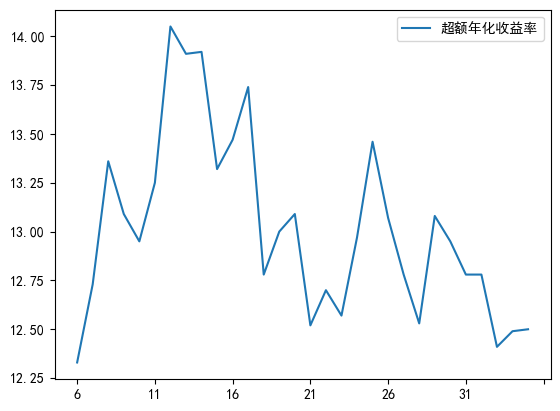

In [33]:
icw_tscs_record.T[['超额年化收益率']].plot()

In [34]:
irw_tscs_record = pd.DataFrame(index = ['净值','年化收益率','超额年化收益率','夏普比率','跟踪误差','信息比率','最大回测','卡玛比率','日平均换手率'])
for n in tqdm(range(6,36,1)):
    irw_tscs = (cat_ic_df.rolling(20 * n).mean()/cat_ic_df.rolling(20 * n).std()).shift(20)
    irw_tscs[irw_tscs < 0] = 0
    irw_tscs.index.names = ['date']
    irw_tscs_combo = value_df.mul(irw_tscs,axis = 1).dropna(how = 'all').sum(axis = 1).unstack('order_book_id')
    net,performance = BACKTEST(irw_tscs_combo.loc['2014-02-01':],'irw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
    irw_tscs_record[str(n)] = performance.loc['net']

100%|██████████| 30/30 [03:05<00:00,  6.20s/it]


<Axes: >

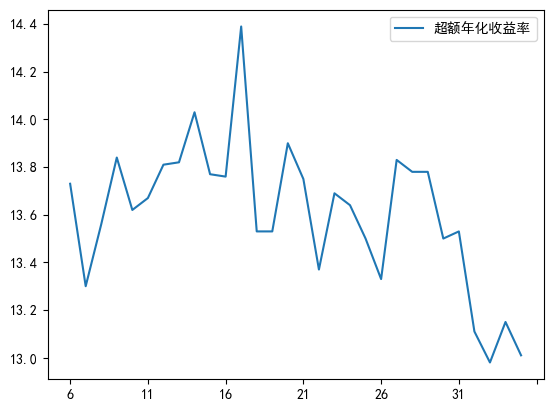

In [35]:
irw_tscs_record.T[['超额年化收益率']].plot()

In [36]:
icwr_tscs_record = pd.DataFrame(index = ['净值','年化收益率','超额年化收益率','夏普比率','跟踪误差','信息比率','最大回测','卡玛比率','日平均换手率'])
for n in tqdm(range(6,36,1)):
    icwr_tscs = (cat_ic_df.rolling(20 * n).apply(lambda x: (x>0).sum()/x.count())).shift(20)
    icwr_tscs[icwr_tscs < 0.5] = 0
    icwr_tscs.index.names = ['date']
    icwr_tscs_combo = value_df.mul(icwr_tscs,axis = 1).dropna(how = 'all').sum(axis = 1).unstack('order_book_id')
    net,performance = BACKTEST(icwr_tscs_combo.loc['2014-02-01':],'irw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
    icwr_tscs_record[str(n)] = performance.loc['net']

100%|██████████| 30/30 [03:17<00:00,  6.58s/it]


<Axes: >

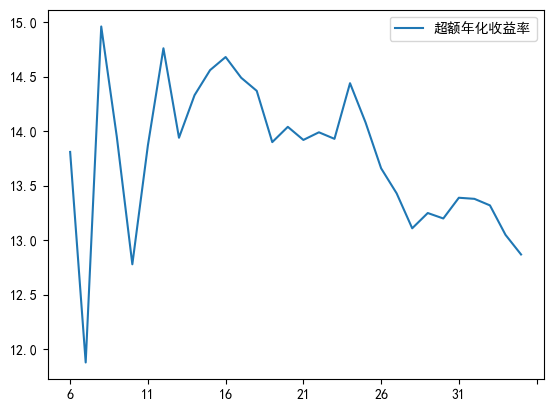

In [37]:
icwr_tscs_record.T[['超额年化收益率']].plot()

#### 合并

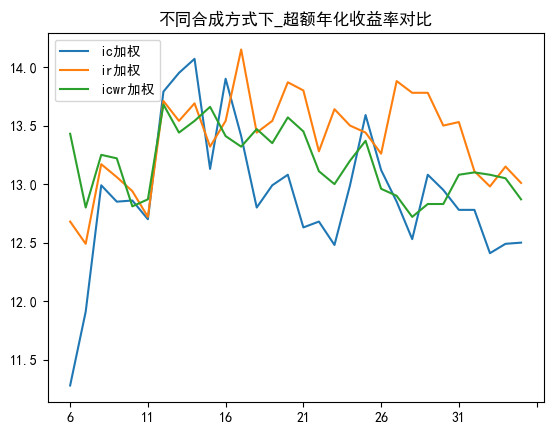

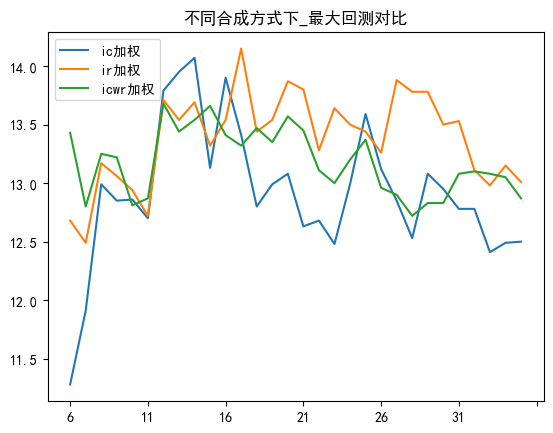

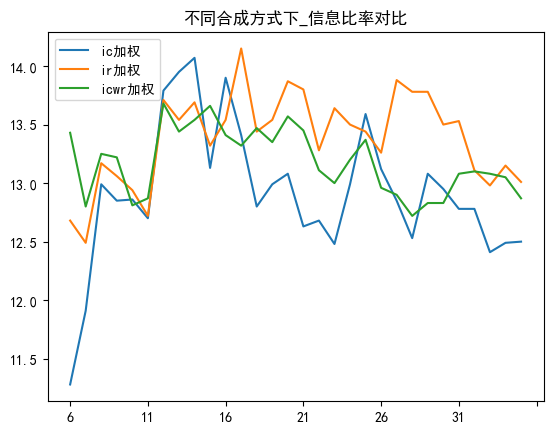

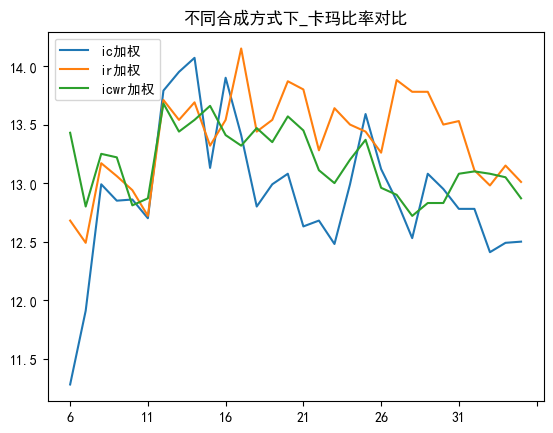

In [39]:
for i in ['超额年化收益率','最大回测','信息比率','卡玛比率']:
    compare = pd.concat([icw_record.loc['超额年化收益率'].to_frame('ic加权'),
                         irw_record.loc['超额年化收益率'].to_frame('ir加权'),
                         icwr_record.loc['超额年化收益率'].to_frame('icwr加权'),
                         ]
                        ,axis = 1)
    compare.plot(title = f'不同合成方式下_{i}对比')

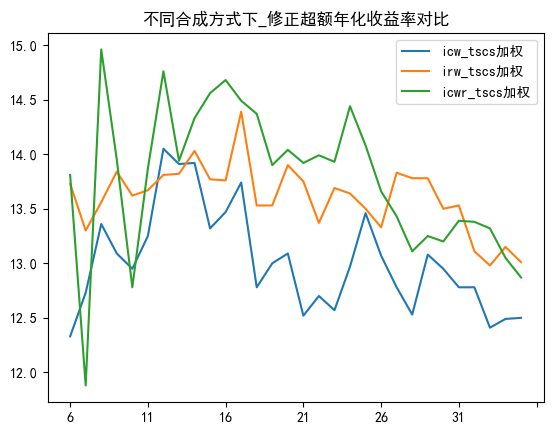

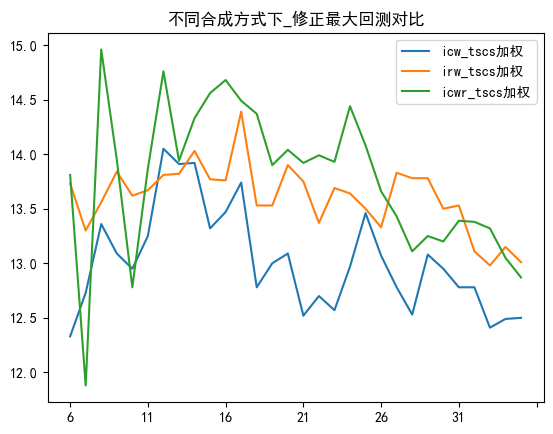

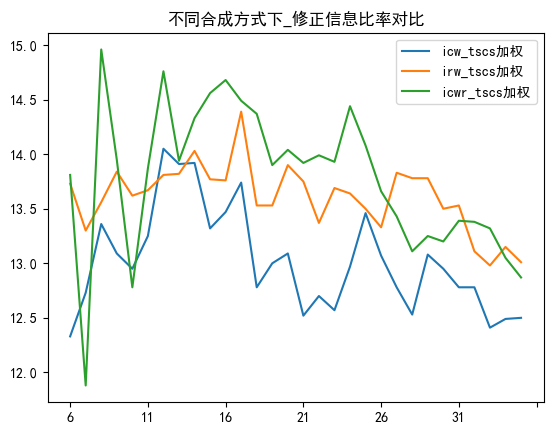

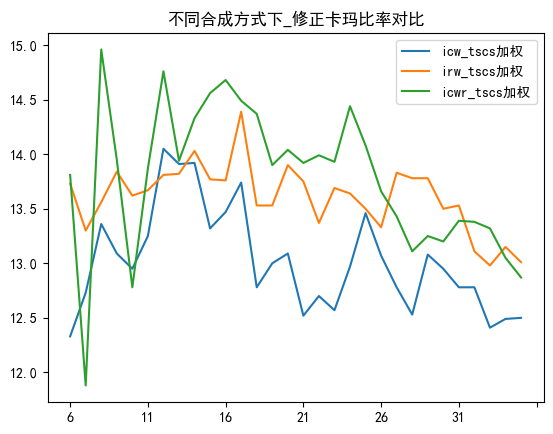

In [42]:
for i in ['超额年化收益率','最大回测','信息比率','卡玛比率']:
    compare = pd.concat([icw_tscs_record.loc['超额年化收益率'].to_frame('icw_tscs加权'),
                         irw_tscs_record.loc['超额年化收益率'].to_frame('irw_tscs加权'),
                         icwr_tscs_record.loc['超额年化收益率'].to_frame('icwr_tscs加权'),
                         ]
                        ,axis = 1)
    compare.plot(title = f'不同合成方式下_修正{i}对比')

#### 因子收益的时序特征

<Axes: xlabel='1'>

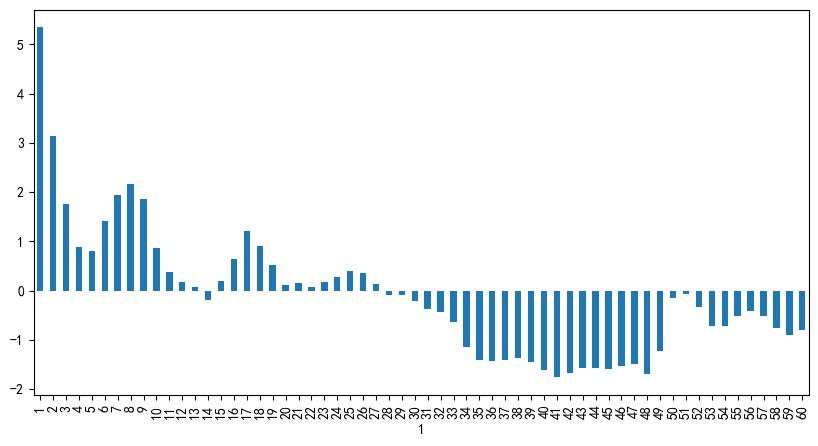

In [149]:
t = 0
beta_record = {}
for n in range(1,61):    
    y = cat_ic_df.rolling(20 * 1).mean().shift(-20)
    # y = cat_ic_df.shift(-1)
    # y = (cat_ic_df.rolling(20).mean()/cat_ic_df.rolling(20).std()).shift(-20)
    x  = (cat_ic_df.rolling(20 * n).mean()/cat_ic_df.rolling(20 * n).std())
    for i in list(value_df.columns):
        y_temp = y[i]
        x_temp = x[i]
        data = pd.concat([y_temp,x_temp],axis = 1).dropna().loc['2016-01-01':]
        data['alpha'] = 1
        beta_record[t] = [sm.OLS(data.iloc[:,:1].astype(float),data.iloc[:,1:].astype(float),hasconst=False, missing='drop').fit().params.iloc[0],n,i]
        t += 1

beta_ts = pd.DataFrame(beta_record).T.set_index([1,2])[0].unstack(2)
T_ts = beta_ts.mean(axis = 1).div(beta_ts.std(axis = 1),axis = 0).mul(np.sqrt(beta_ts.shape[1]),axis = 0)
T_ts.plot(kind = 'bar',figsize=(10,5))

#### 因子收益的截面特征

In [190]:
t = 0
beta_record = {}
for n in range(1,60):    
    y = cat_ic_df.rolling(20 * 1).mean().shift(-20)   #.rolling(20 * n).mean()
    x  = (cat_ic_df.rolling(20 * n).mean()/cat_ic_df.rolling(20 * n).std())
    for i in tqdm(date_list[20*60:-40]):
        i = i.strftime('%F')
        y_temp = y.loc[i]
        x_temp = x.loc[i]
        data = pd.concat([y_temp,x_temp],axis = 1).dropna()
        data['alpha'] = 1
        beta_record[t] = [sm.OLS(data.iloc[:,:1].astype(float),data.iloc[:,1:].astype(float),hasconst=False, missing='drop').fit().params.iloc[0],n,i]
        t += 1

beta_record_cs = pd.DataFrame(beta_record,index = ['beta','t','date']).T.dropna()

100%|██████████| 705/705 [00:00<00:00, 745.24it/s]


<Axes: xlabel='t'>

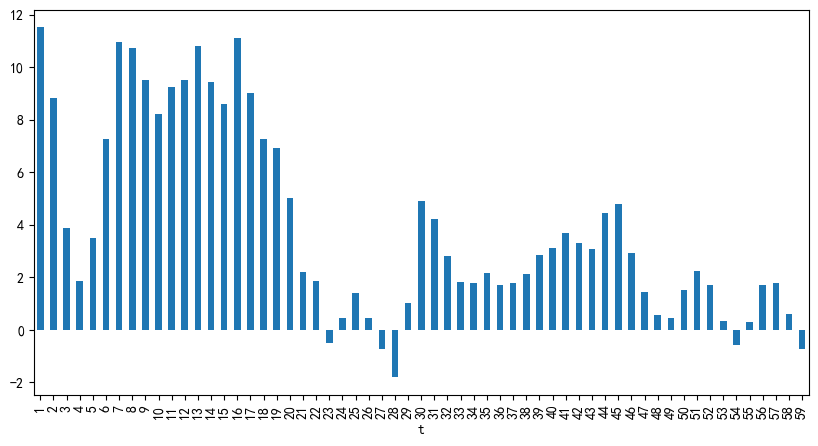

In [221]:
T_cs = beta_record_cs.groupby('t').beta.mean() / beta_record_cs.groupby('t').beta.std() * np.sqrt(beta_record_cs.groupby('t').beta.count())
T_cs.plot(kind = 'bar',figsize=(10,5))

<Axes: >

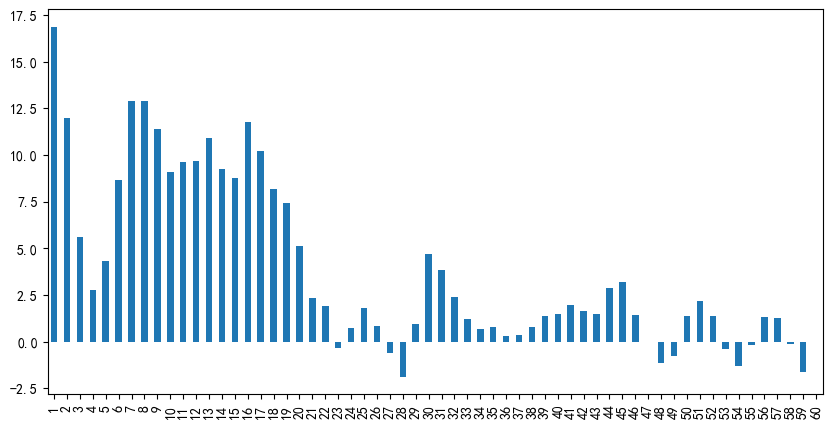

In [222]:
(T_cs + T_ts).plot(kind = 'bar',figsize=(10,5))

In [243]:
n = 12
irw_tscs = (cat_ic_df.rolling(20 * n).mean()/cat_ic_df.rolling(20 * n).std()).shift(20)
irw_tscs[irw_tscs < 0] = 0
irw_tscs.index.names = ['date']
irw_tscs_combo = value_df.mul(irw_tscs,axis = 1).dropna(how = 'all').sum(axis = 1).unstack('order_book_id')
new_net,performance = BACKTEST(irw_tscs_combo.loc['2014-02-01':],'irw_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
performance

100%|██████████| 60/60 [00:03<00:00, 16.45it/s]


,净值,年化收益率,超额年化收益率,夏普比率,跟踪误差,信息比率,最大回测,卡玛比率,日平均换手率
net,2.3321,20.64,13.81,0.5,0.069819,2.53,42.7,0.41,0.037131


In [244]:
old_net,performance = BACKTEST(ew_combo.loc['2014-02-01':],'ew_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
performance

100%|██████████| 60/60 [00:03<00:00, 15.42it/s]


,净值,年化收益率,超额年化收益率,夏普比率,跟踪误差,信息比率,最大回测,卡玛比率,日平均换手率
net,2.2332,19.49,12.6,0.47,0.069265,2.38,43.91,0.38,0.034178


In [245]:
new_cumnet = (new_net + 1).cumprod()
old_cumnet = (old_net + 1).cumprod()

cumnet_compare = pd.concat([(new_cumnet['net']/new_cumnet['benchmark']).to_frame('因子动量配置'),
           (old_cumnet['net']/old_cumnet['benchmark']).to_frame('因子等权配置')],axis = 1)

<Axes: >

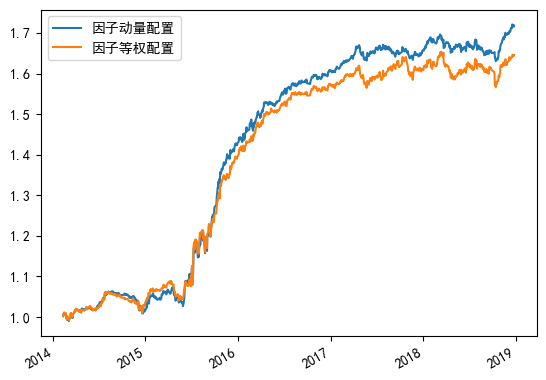

In [246]:
cumnet_compare.plot()

### 因子离散度

In [253]:
start_date = '2005-01-01'
end_date = '2017-01-01'

universe = '000905.XSHG'

index_fix = INDEX_FIX(start_date,end_date,universe)
stock_list = index_fix.columns.tolist()
date_list = index_fix.index.tolist()

#### BP

In [291]:
# ep = execute_factor(Factor('ep_ratio_ttm'),stock_list,start_date,end_date).mask(~index_fix)
bp = execute_factor(Factor('book_to_market_ratio_ttm'),stock_list,start_date,end_date).mask(~index_fix)

In [285]:
zx2019_industry = rqdatac.client.get_client().execute('__internal__zx2019_industry')
df = pd.DataFrame(zx2019_industry)
df.set_index(['order_book_id', 'start_date'], inplace=True)
df = df['first_industry_name'].sort_index()

#构建动态行业数据表格
index = pd.MultiIndex.from_product([stock_list, date_list], names=['order_book_id', 'datetime'])
pos = df.index.searchsorted(index, side='right') - 1
index = index.swaplevel()   # level change (oid, datetime) --> (datetime, oid)
result = pd.Series(df.values[pos], index=index)
result = result.sort_index()

In [292]:
bp = bp.stack().to_frame('factor')
bp['industry'] = result
bp = bp.reset_index()

In [302]:
bp_industry_top = (bp.groupby(['date','industry']).factor.apply(lambda x: x[x > x.quantile(0.8)].median())).unstack('industry')
bp_industry_bottom = (bp.groupby(['date','industry']).factor.apply(lambda x: x[x < x.quantile(0.2)].median())).unstack('industry')
# 行业
bp_industry_gap = bp_industry_top.sub(bp_industry_bottom,axis = 0)
# 全市场
bp_gap = bp_industry_gap.mean(axis = 1)
# 时序标准分
bp_detrend = (bp_gap - bp_gap.rolling(24*20).mean()) / bp_gap.rolling(24*20).std()

<Axes: xlabel='date'>

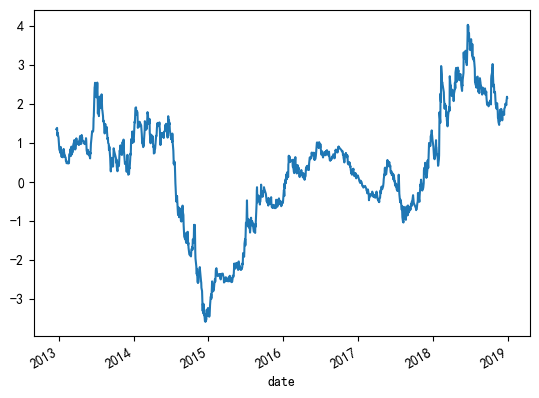

In [319]:

bp_detrend.plot()

In [322]:
bp = execute_factor(Factor('book_to_market_ratio_ttm'),stock_list,start_date,end_date).mask(~index_fix)
ret_1 = get_price(stock_list,start_date,end_date,fields='close').close.unstack('order_book_id').pct_change().dropna(how = 'all')

In [342]:
top_ret = ret_1.mask(~(bp.sub(bp.quantile(0.9,axis = 1),axis = 0) > 0)).mean(axis = 1)
bottom_ret = ret_1.mask(~(bp.sub(bp.quantile(0.1,axis = 1),axis = 0) < 0)).mean(axis = 1)

In [349]:
bp_detrend = bp_detrend.dropna().to_frame('detrend')
bp_detrend['top_bottom'] = bottom_ret - top_ret
bp_detrend['top_bottom'] = np.log((bp_detrend['top_bottom'] + 1).cumprod())

<Axes: xlabel='date'>

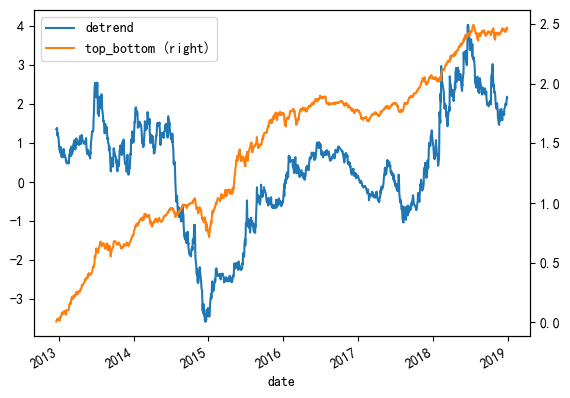

In [356]:
bp_detrend.plot(secondary_y = 'top_bottom')

In [254]:
def industry(stock_list, date_list):
    zx2019_industry = rqdatac.client.get_client().execute('__internal__zx2019_industry')
    df = pd.DataFrame(zx2019_industry)
    df.set_index(['order_book_id', 'start_date'], inplace=True)
    df = df['first_industry_name'].sort_index()

    #构建动态行业数据表格
    index = pd.MultiIndex.from_product([stock_list, date_list], names=['order_book_id', 'datetime'])
    pos = df.index.searchsorted(index, side='right') - 1
    index = index.swaplevel()   # level change (oid, datetime) --> (datetime, oid)
    result = pd.Series(df.values[pos], index=index)
    result = result.sort_index()
    return result
    

def detrand(f,stock_list,date_list,start_date,end_date):


    df = execute_factor(f,stock_list,start_date,end_date).mask(~index_fix)
    try:
        result = pd.read_pickle(f'tmp/industry_maxtrix_{start_date}_{end_date}.pkl')
    except:
        result = industry(stock_list, date_list)
        result.to_pickle('tmp/industry_maxtrix_{start_date}_{end_date}.pkl')

    df = df.stack().to_frame('factor')
    df['industry'] = result
    df = df.reset_index()
    df.columns = ['date','order_book_id','factor','industry']
    df_industry_top = (df.groupby(['date','industry']).factor.apply(lambda x: x[x > x.quantile(0.8)].median())).unstack('industry')
    df_industry_bottom = (df.groupby(['date','industry']).factor.apply(lambda x: x[x < x.quantile(0.2)].median())).unstack('industry')
    # 行业
    df_industry_gap = df_industry_top.sub(df_industry_bottom,axis = 0)
    # 全市场
    df_gap = df_industry_gap.mean(axis = 1)
    # 时序标准分
    df_detrend = (df_gap - df_gap.rolling(24*20).mean()) / df_gap.rolling(24*20).std()

    df = execute_factor(f,stock_list,start_date,end_date).mask(~index_fix)
    try:
        ret_1 = pd.read_pickle(f'tmp/ret1_{start_date}_{end_date}.pkl')
    except:
        ret_1 = get_price(stock_list,start_date,end_date,
                        fields='close').close.unstack('order_book_id').pct_change().dropna(how = 'all')
        ret_1.to_pickle(f'tmp/ret1_{start_date}_{end_date}.pkl')
    top_ret = ret_1.mask(~(df.sub(df.quantile(0.9,axis = 1),axis = 0) > 0)).mean(axis = 1)
    bottom_ret = ret_1.mask(~(df.sub(df.quantile(0.1,axis = 1),axis = 0) < 0)).mean(axis = 1)
    df_detrend = df_detrend.dropna().to_frame('detrend')
    df_detrend['top_bottom'] = bottom_ret - top_ret
    df_detrend['top_bottom'] = np.log((df_detrend['top_bottom'] + 1).cumprod())

    return df_detrend

#### bp_ratio

In [255]:
bp_detrend = detrand(Factor('book_to_market_ratio_ttm'),stock_list,date_list,start_date,end_date)

<Axes: xlabel='date'>

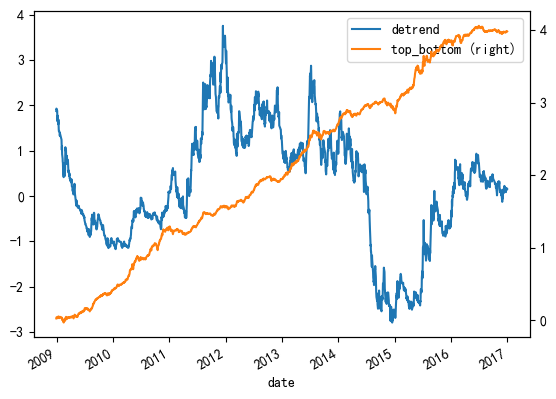

In [256]:
bp_detrend.plot(secondary_y = 'top_bottom')

In [258]:
bp_detrend.corr() 

,detrend,top_bottom
detrend,1.000000,-0.118388
top_bottom,-0.118388,1.000000


In [270]:
bp_detrend.detrend.corr((ic_df['bp'].rolling(12*20).mean()/ic_df['bp'].rolling(12*20).std()).dropna())

-0.4612431568784831

#### current_ratio

In [272]:
cr_detrend = detrand(Factor('current_ratio_ttm') * -1,stock_list,date_list,start_date,end_date)

<Axes: xlabel='date'>

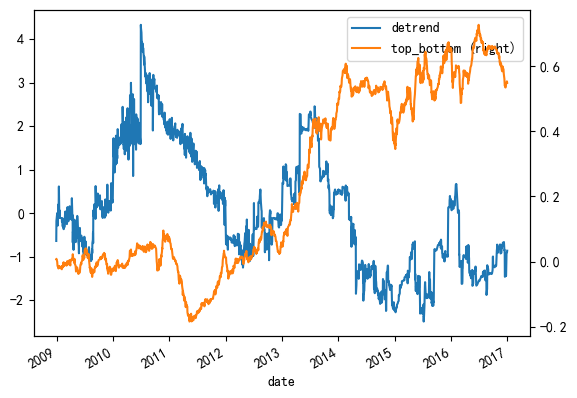

In [273]:
cr_detrend.plot(secondary_y = 'top_bottom')

In [274]:
cr_detrend.corr()

,detrend,top_bottom
detrend,1.000000,-0.559283
top_bottom,-0.559283,1.000000


In [275]:
cr_detrend.detrend.corr((ic_df['cur'].rolling(12*20).mean()/ic_df['cur'].rolling(12*20).std()).dropna())

0.5664655445858877

#### mc2

In [262]:
mc2_detrend = detrand(LOG(Factor('market_cap_2')) * -1,stock_list,date_list,start_date,end_date)

<Axes: xlabel='date'>

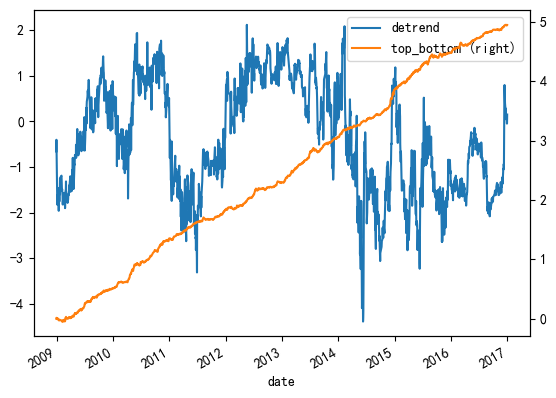

In [263]:
mc2_detrend.plot(secondary_y = 'top_bottom')

In [264]:
mc2_detrend.corr()

,detrend,top_bottom
detrend,1.000000,-0.324241
top_bottom,-0.324241,1.000000


In [271]:
mc2_detrend.detrend.corr((ic_df['mc2'].rolling(12*20).mean()/ic_df['mc2'].rolling(12*20).std()).dropna())

-0.09461943065543439

In [277]:
cr_detrend['detrend_z'] = (cr_detrend['detrend'] - cr_detrend['detrend'].rolling(240).mean())/cr_detrend['detrend'].rolling(240).std()

In [334]:
net,performance = BACKTEST(value_dict['cur'].loc['2014-02-01':],'ew_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG')
performance

100%|██████████| 60/60 [00:04<00:00, 14.43it/s]


,净值,年化收益率,超额年化收益率,夏普比率,跟踪误差,信息比率,最大回测,卡玛比率,日平均换手率
net,1.6331,11.48,5.85,0.23,0.072915,1.16,52.85,0.16,0.009258


,net_values,year_ret_sqrt,sharpe,downlow,volitiy
raw_net,1.6331,11.48,0.23,52.85,36.66


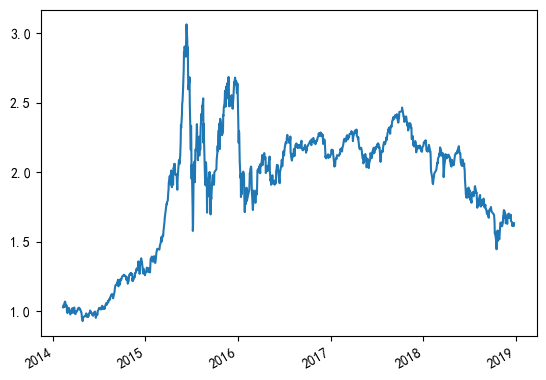

In [335]:
raw_net = (net + 1).cumprod().net
raw_net.plot()
pd.DataFrame(get_Performance_analysis(raw_net),index = ['net_values','year_ret_sqrt','sharpe','downlow','volitiy'],columns=['raw_net']).T

,net_values,year_ret_sqrt,sharpe,downlow,volitiy
fix_net,2.2367,35.0,0.8,48.53,39.85


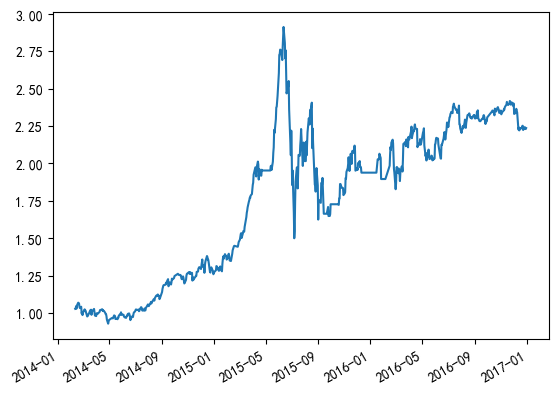

In [336]:
fix_ret = ((net.net *(cr_detrend.detrend_z.dropna() < 2)).dropna() + 1).cumprod()
fix_ret.plot()
pd.DataFrame(get_Performance_analysis(fix_ret),index = ['net_values','year_ret_sqrt','sharpe','downlow','volitiy'],columns=['fix_net']).T

### 拥挤度

|拥挤度指标|因子拥挤度定义|
|-|-|
|多空换手率比率|因子分组下，多空两组的平均个股换手率比值；换手率为个股过去3个月的日均成交换手率；|
|多空波动率比率|因子分组下，多空两组的平均个股波动率比值；波动率为个股过去3个月的收益率标准差；|
|多空beta比率|因子分组下，多空两组的平均个股beta比值；beta为过去3个月个股收益与万得全A指数收益回归的beta；|

In [316]:
start_date = '2011-01-01'
end_date = '2019-01-01'

universe = '000906.XSHG'

# 动态券池
def INDEX_FIX(start_date,end_date,index_item):
    """
    :param start_date: 开始日 -> str
    :param end_date: 结束日 -> str 
    :param index_item: 指数代码 -> str 
    :return index_fix: 动态因子值 -> unstack
    """
    
    index = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in index_components(index_item,start_date= start_date,end_date=end_date).items()])).T

    # 构建动态股票池 
    index_fix = index.unstack().reset_index().iloc[:,-2:]
    index_fix.columns = ['date','stock']
    index_fix.date = pd.to_datetime(index_fix.date)
    index_fix['level'] = True
    index_fix.dropna(inplace = True)
    index_fix = index_fix.set_index(['date','stock']).level.unstack()
    index_fix.fillna(False,inplace = True)

    return index_fix

index_fix = INDEX_FIX(start_date,end_date,universe)
stock_list = index_fix.columns.tolist()
date_list = index_fix.index.tolist()

ret_1 = get_price(stock_list,start_date,end_date,fields=['open']).open.unstack('order_book_id').pct_change().dropna(how = 'all').mask(~index_fix)

In [317]:
roe = execute_factor(Factor('return_on_equity_ttm'),stock_list,start_date,end_date).mask(~index_fix)
roe_top = roe.mask((roe.sub(roe.quantile(0.8,axis = 1),axis = 0)) < 0)
roe_bottom = roe.mask(roe.sub(roe.quantile(0.2,axis = 1),axis = 0) > 0)
roe_top_bottom_ret = (ret_1.mask(roe_top.isnull()).mean(axis = 1) - ret_1.mask(roe_bottom.isnull()).mean(axis = 1))

<Axes: xlabel='date'>

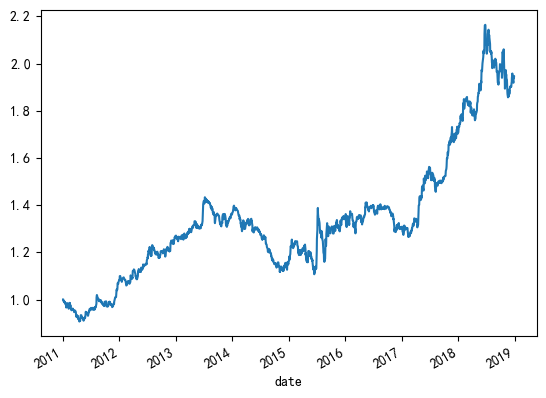

In [318]:
(roe_top_bottom_ret+1).cumprod().plot()

#### 多空换手率比率

In [319]:
from rqfactor.extension import UserDefinedLeafFactor
def turnover_rate(order_book_ids,start_date,end_date):
    return rqdatac.get_turnover_rate(order_book_ids,start_date,end_date,fields='today').today.unstack('order_book_id').reindex(columns=order_book_ids,index =pd.to_datetime(rqdatac.get_trading_dates(start_date,end_date)))

DAILY_TURNOVER_RATE = UserDefinedLeafFactor('DAILY_TURNOVER_RATE',turnover_rate)

In [321]:
turnover_ratio = execute_factor(DAILY_TURNOVER_RATE,stock_list,start_date,end_date).mask(~index_fix)
turnover_ratio.to_pickle('turnover_ratio.pkl')
turnover_ratio_3m = turnover_ratio.rolling(60).mean().dropna(how = 'all')

<Axes: >

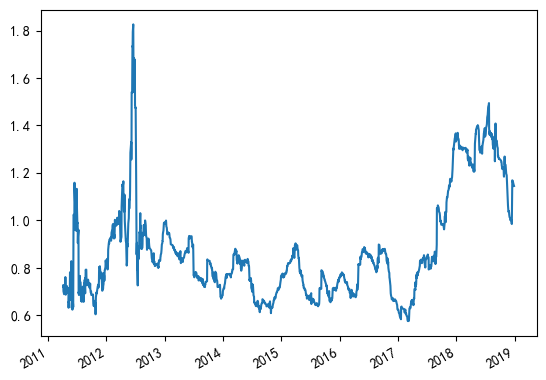

In [322]:
crowd_turnover_ratio = turnover_ratio_3m.mask(roe_top.isnull()).mean(axis = 1)/turnover_ratio_3m.mask(roe_bottom.isnull()).mean(axis = 1)
crowd_turnover_ratio.plot()

In [323]:
crowd_turnover_ratio.corr((roe_top_bottom_ret+1).cumprod())

0.6622681241096048

#### 多空波动率

In [324]:
vol_3m = get_price(stock_list,start_date,end_date,fields = 'close').close.unstack('order_book_id').pct_change().rolling(60).std().dropna(how = 'all')

<Axes: xlabel='date'>

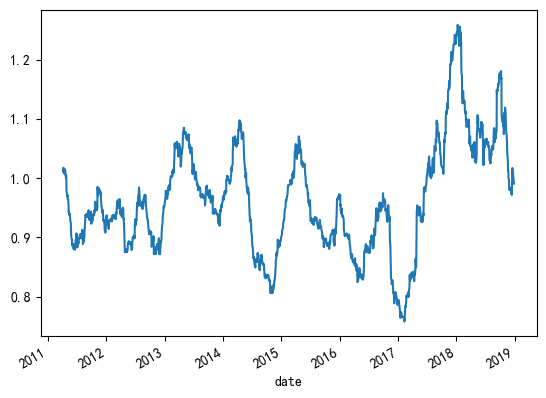

In [325]:
crowd_vol_ratio = vol_3m.mask(roe_top.isnull()).mean(axis = 1)/vol_3m.mask(roe_bottom.isnull()).mean(axis = 1)
crowd_vol_ratio.plot()

In [326]:
crowd_vol_ratio.corr((roe_top_bottom_ret+1).cumprod())

0.5692851313854816

#### 多空beta比率

In [327]:
beta = get_factor_exposure(stock_list,start_date,end_date,factors=['beta']).beta.unstack('order_book_id')

In [328]:
beta.stack().describe()

count    2.456274e+06
mean     6.745646e-02
std      9.622948e-01
min     -3.441814e+00
25%     -4.973692e-01
50%      1.407428e-01
75%      7.088598e-01
max      3.425013e+00
dtype: float64

<Axes: xlabel='date'>

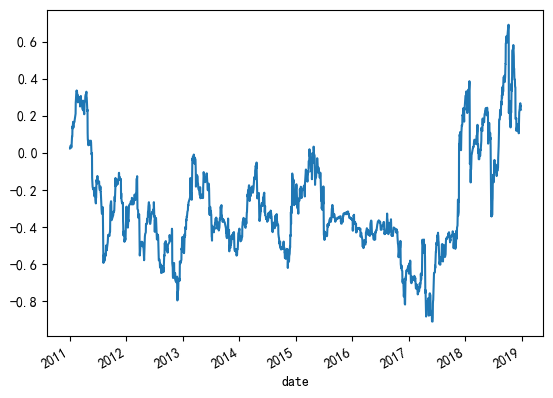

In [329]:
crowd_beta_ratio = beta.mask(roe_top.isnull()).mean(axis = 1) - beta.mask(roe_bottom.isnull()).mean(axis = 1)
crowd_beta_ratio.plot()

In [330]:
crowd_beta_ratio.corr((roe_top_bottom_ret+1).cumprod())

0.3306430234584507

#### 合成

In [338]:
crowd_compare = pd.concat([crowd_turnover_ratio.to_frame('crowd_turnover_ratio'),
                           crowd_vol_ratio.to_frame('crowd_vol_ratio'),
                           crowd_beta_ratio.to_frame('crowd_beta_ratio')],axis = 1).dropna()

crowd_compare_z = ((crowd_compare - crowd_compare.rolling(240).mean())/crowd_compare.rolling(240).std()).dropna()

In [351]:
for i in ['crowd_turnover_ratio','crowd_vol_ratio','crowd_beta_ratio']:
    print(i,crowd_compare_z[i].corr((roe_top_bottom_ret.loc['2012-03-28':]+1).cumprod()))

crowd_turnover_ratio 0.19737731636377012
crowd_vol_ratio 0.09280634743528506
crowd_beta_ratio 0.3665096426690637


In [356]:
crowd_compare_z.mean(axis = 1).corr((roe_top_bottom_ret.loc['2012-03-28':]+1).cumprod())

0.2749831163872918

100%|██████████| 98/98 [00:06<00:00, 14.29it/s]


,净值,年化收益率,超额年化收益率,夏普比率,跟踪误差,信息比率,最大回测,卡玛比率,日平均换手率
net,1.0638,0.85,5.75,-0.08,0.083916,-0.26,50.99,-0.04,0.007486


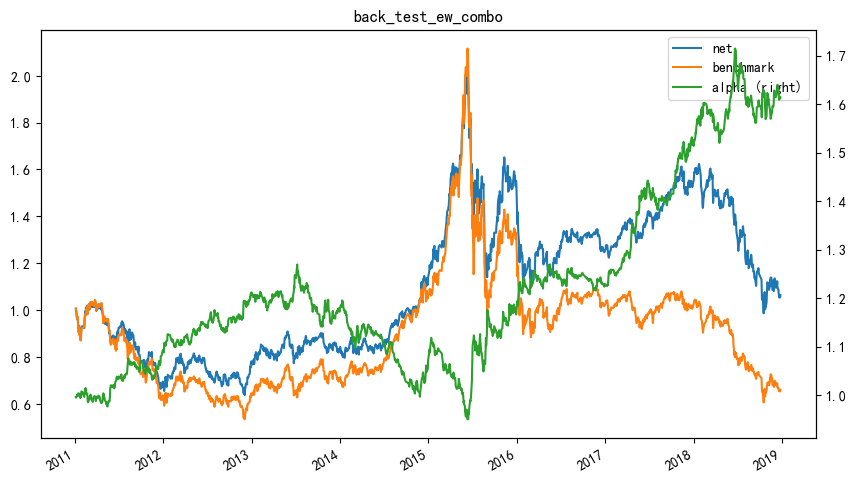

In [357]:
net,performance = BACKTEST(roe,'ew_combo',n = 100,change_days = 20,tax = 0.0005,commission = 0.0002,benchmark = '000905.XSHG',fig=True)
performance

,net_values,year_ret_sqrt,sharpe,downlow,volitiy
raw_net,1.0638,0.85,-0.08,50.99,26.84


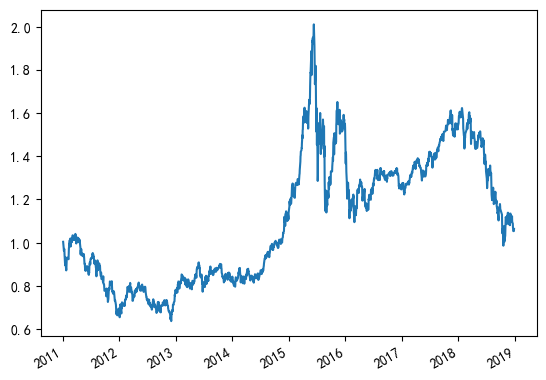

In [358]:
raw_net = (net + 1).cumprod().net
raw_net.plot()
pd.DataFrame(get_Performance_analysis(raw_net),index = ['net_values','year_ret_sqrt','sharpe','downlow','volitiy'],columns=['raw_net']).T

,net_values,year_ret_sqrt,sharpe,downlow,volitiy
fix_net,1.5982,7.86,0.18,47.23,26.35


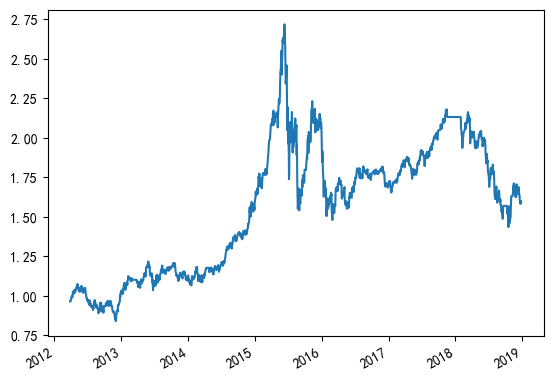

In [359]:
fix_ret = ((net.net *(crowd_compare_z.crowd_beta_ratio.dropna() < 2)).dropna() + 1).cumprod()
fix_ret.plot()
pd.DataFrame(get_Performance_analysis(fix_ret),index = ['net_values','year_ret_sqrt','sharpe','downlow','volitiy'],columns=['fix_net']).T

,net_values,year_ret_sqrt,sharpe,downlow,volitiy
fix_net,1.3877,5.43,0.09,51.5,26.71


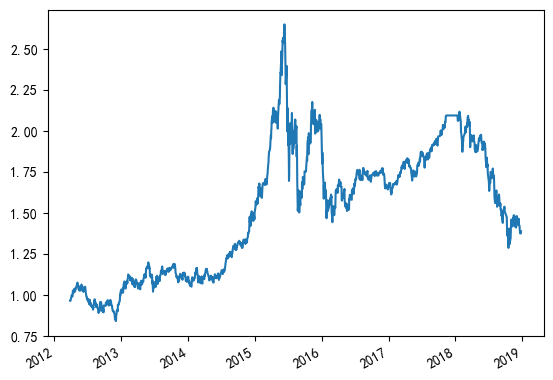

In [362]:
fix_ret = ((net.net *(crowd_compare_z.mean(axis = 1).dropna() < 2)).dropna() + 1).cumprod()
fix_ret.plot()
pd.DataFrame(get_Performance_analysis(fix_ret),index = ['net_values','year_ret_sqrt','sharpe','downlow','volitiy'],columns=['fix_net']).T